# Análisis multivariado

In [1]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

In [3]:
df = palmerpenguins.load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Análisis de regresión múltiple

### Creando modelos

#### Modelo 1

In [4]:
model_1 = (smf.ols(formula='body_mass_g ~ bill_length_mm', data=df)).fit()

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     186.4
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           3.81e-34
Time:                        08:50:07   Log-Likelihood:                -2697.0
No. Observations:                 342   AIC:                             5398.
Df Residuals:                     340   BIC:                             5406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        362.3067    283.345      1.279      0.202    -195.024     919.637
bill_length_mm    87.4153      6.402     13.654      0.000      74.823     100.008
==============================================================================
Omnibus:                        5.671   Durbin-Watson:                   0.866
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                4.857
Skew:                          -0.211   Prob(JB):                       0.0882
Kurtosis:                       2.597   Cond. No.                         359.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Modelo 2

In [5]:
model_2 = (smf.ols(formula='body_mass_g ~ bill_length_mm + bill_depth_mm', data=df)).fit()

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     150.8
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           1.40e-47
Time:                        08:50:08   Log-Likelihood:                -2662.9
No. Observations:                 342   AIC:                             5332.
Df Residuals:                     339   BIC:                             5343.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3343.1359    429.912      7.776      0.000    2497.504    4188.768
bill_length_mm    75.2808      5.971     12.608      0.000      63.537      87.025
bill_depth_mm   -142.7226     16.507     -8.646      0.000    -175.191    -110.254
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                2.019
Skew:                           0.001   Prob(JB):                        0.364
Kurtosis:                       2.624   Cond. No.                         645.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Modelo 3

In [6]:
model_3 = (smf.ols(formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm', data=df)).fit()

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     359.7
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          8.19e-105
Time:                        08:50:08   Log-Likelihood:                -2526.7
No. Observations:                 342   AIC:                             5061.
Df Residuals:                     338   BIC:                             5077.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6424.7647    561.469    -11.443      0.000   -7529.179   -5320.351
bill_length_mm        4.1618      5.329      0.781      0.435      -6.321      14.644
bill_depth_mm        20.0495     13.694      1.464      0.144      -6.887      46.986
flipper_length_mm    50.2692      2.477     20.293      0.000      45.397      55.142
==============================================================================
Omnibus:                        5.263   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                5.129
Skew:                           0.298   Prob(JB):                       0.0770
Kurtosis:                       3.065   Cond. No.                     5.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo 4

In [7]:
model_4 = (smf.ols(formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)', data=df)).fit()

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          6.28e-122
Time:                        08:50:08   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo 5

In [8]:
model_5 = (smf.ols(formula='body_mass_g ~ flipper_length_mm', data=df)).fit()

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1071.
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          4.37e-107
Time:                        08:50:08   Log-Likelihood:                -2528.4
No. Observations:                 342   AIC:                             5061.
Df Residuals:                     340   BIC:                             5069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5780.8314    305.815    -18.903      0.000   -6382.358   -5179.305
flipper_length_mm    49.6856      1.518     32.722      0.000      46.699      52.672
==============================================================================
Omnibus:                        5.634   Durbin-Watson:                   2.190
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                5.585
Skew:                           0.313   Prob(JB):                       0.0613
Kurtosis:                       3.019   Cond. No.                     2.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
model_5 = (smf.ols(formula='body_mass_g ~ flipper_length_mm + C(sex)', data=df)).fit()

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          3.53e-118
Time:                        08:50:08   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Visualización del análisis de regresión múltiple

In [10]:
models_result = pd.DataFrame(
    dict(
        actual_value = df.body_mass_g,
        prediction_model_1 = model_1.predict(),
        prediction_model_2 = model_2.predict(),
        prediction_model_3 = model_3.predict(),
        prediction_model_4 = model_4.predict(),
        prediction_model_5 = model_5.predict(),
        species=df.species,
        sex=df.sex
    )
)

models_result 

ValueError: All arrays must be of the same length

In [11]:
array_lengths = {
    'actual_value': len(df.body_mass_g),
    'prediction_model_1': len(model_1.predict()),
    'prediction_model_2': len(model_2.predict()),
    'prediction_model_3': len(model_3.predict()),
    'prediction_model_4': len(model_4.predict()),
    'prediction_model_5': len(model_5.predict()),
    'species': len(df.species),
    'sex': len(df.sex)
}

print(array_lengths)

{'actual_value': 344, 'prediction_model_1': 342, 'prediction_model_2': 342, 'prediction_model_3': 342, 'prediction_model_4': 333, 'prediction_model_5': 333, 'species': 344, 'sex': 344}


In [14]:
import pandas as pd

# Create a mask to filter out rows without predictions
prediction_mask = (
    ~pd.Series(model_1.predict()).isnull()
    & ~pd.Series(model_2.predict()).isnull()
    & ~pd.Series(model_3.predict()).isnull()
    & ~pd.Series(model_4.predict()).isnull()
    & ~pd.Series(model_5.predict()).isnull()
)

# Reset the index of the prediction mask
prediction_mask = prediction_mask.reset_index(drop=True)

# Filter the dataset and predictions based on the mask
filtered_df = df[prediction_mask]
predictions_1 = pd.Series(model_1.predict())[prediction_mask]
predictions_2 = pd.Series(model_2.predict())[prediction_mask]
predictions_3 = pd.Series(model_3.predict())[prediction_mask]
predictions_4 = pd.Series(model_4.predict())[prediction_mask]
predictions_5 = pd.Series(model_5.predict())[prediction_mask]

# Create the DataFrame with aligned predictions
models_result = pd.DataFrame(
    dict(
        actual_value=filtered_df['body_mass_g'],
        prediction_model_1=predictions_1,
        prediction_model_2=predictions_2,
        prediction_model_3=predictions_3,
        prediction_model_4=predictions_4,
        prediction_model_5=predictions_5,
        species=filtered_df['species'],
        sex=filtered_df['sex']
    )
)

C:\Users\usuario\AppData\Local\Temp\ipykernel_9952\2483623767.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = df[prediction_mask]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

### ECDFs

In [ ]:
sns.ecdfplot(data=models_results)

In [15]:
sns.ecdfplot(data=models_results.select_columns(['actual_value', 'prediction_model_5']))

NameError: name 'models_results' is not defined

### PDFs

In [16]:
sns.kdeplot(data=model_results)

NameError: name 'model_results' is not defined

In [17]:
sns.kdeplot(data=model_results, cumulative=True)

NameError: name 'model_results' is not defined

### ¿Qué pudimos haber encontrado antes de hacer los modelos?

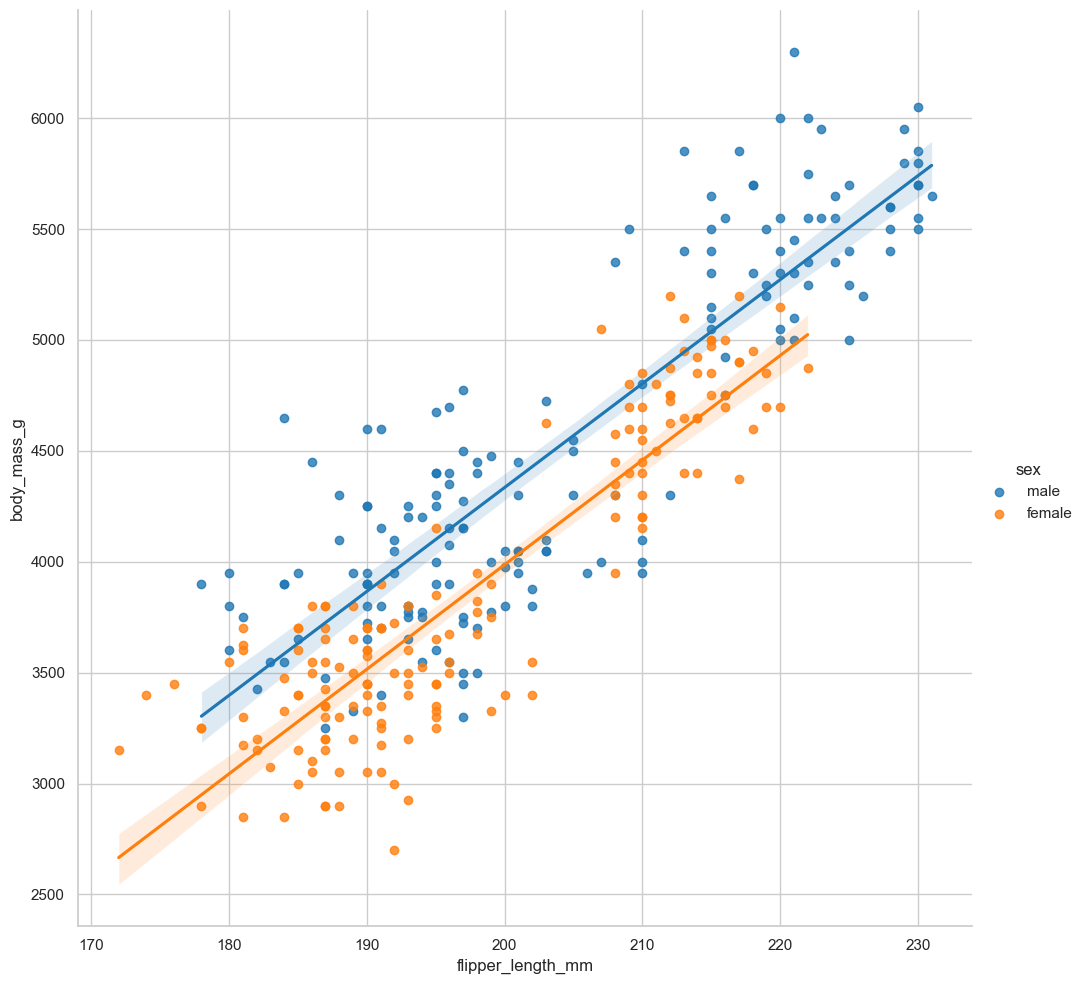

In [19]:
sns.lmplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='sex', height=10)
plt.show()

## Análisis de regresión logística

In [20]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [21]:
df = df.assign(numeric_sex=lambda df1 : df1.sex.replace(['female', 'male'], [0,1]))
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,numeric_sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0.0
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,1.0
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,0.0
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,1.0
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,1.0


### ¿Podemos crear un modelo que nos ayude a definir si un pinguino es macho o hembra?

In [23]:
smf.logit(
    formula='numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
    data=df
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Tue, 27 Jun 2023   Pseudo R-squ.:                  0.4793
Time:                        09:25:41   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

In [24]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [25]:
-1.5596 - (-1.0323)

-0.5273000000000001

### Exploración de nuestras variables categóricas

In [26]:
df.value_counts(['island', 'sex']).reset_index(name='count')

,island,sex,count
0,Biscoe,male,83
1,Biscoe,female,80
2,Dream,male,62
3,Dream,female,61
4,Torgersen,female,24
5,Torgersen,male,23


In [28]:
df.value_counts(['species','island', 'sex']).reset_index(name='count')

,species,island,sex,count
0,Gentoo,Biscoe,male,61
1,Gentoo,Biscoe,female,58
2,Chinstrap,Dream,female,34
3,Chinstrap,Dream,male,34
4,Adelie,Dream,male,28
5,Adelie,Dream,female,27
6,Adelie,Torgersen,female,24
7,Adelie,Torgersen,male,23
8,Adelie,Biscoe,female,22
9,Adelie,Biscoe,male,22


### ¿Podemos definir un modelo que nos ayude a identificar si un pinguino pertenece a determinada especie?

In [30]:
df = (df.assign(is_adelie=lambda df2:df2.species.replace(['Adelie', 'Gentoo', 'Chinstrap'], [1,0,0])))
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,numeric_sex,is_adelie
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0.0,1
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0.0,1
...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,1.0,0
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,0.0,0
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,1.0,0
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,1.0,0


In [33]:
model_is_adelie = smf.logit(
    formula='is_adelie  ~ flipper_length_mm + C(sex) ',
    data = df 
).fit()

model_is_adelie.params

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


Intercept            40.568368
C(sex)[T.male]        1.282656
flipper_length_mm    -0.209705
dtype: float64

In [35]:
is_adelie_predictions = pd.DataFrame(
    dict(
        actual_adelie = df.is_adelie,
        predicted_values = model_is_adelie.predict().round()
    )
)

ValueError: array length 333 does not match index length 344

In [36]:
is_adelie_predictions.value_counts(['actual_adelie', 'predicted_values']).reset_index(name='count')

NameError: name 'is_adelie_predictions' is not defined

In [37]:
print(sklearn.metrics.confusion_matrix(
    is_adelie_predictions.actual_adelie,
    is_adelie_predictions.predicted_values
))

sklearn.metrics.accuracy_score(
    is_adelie_predictions.actual_adelie,
    is_adelie_predictions.predicted_values
)

NameError: name 'is_adelie_predictions' is not defined

## Paradoja de Simpson

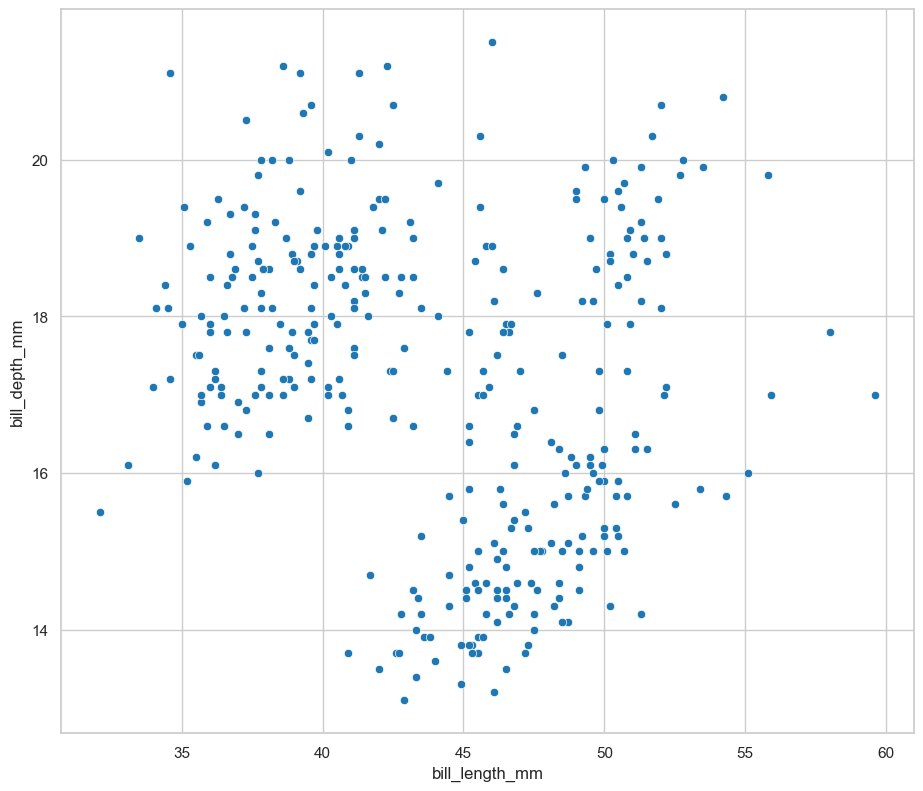

In [39]:
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm')
plt.show()

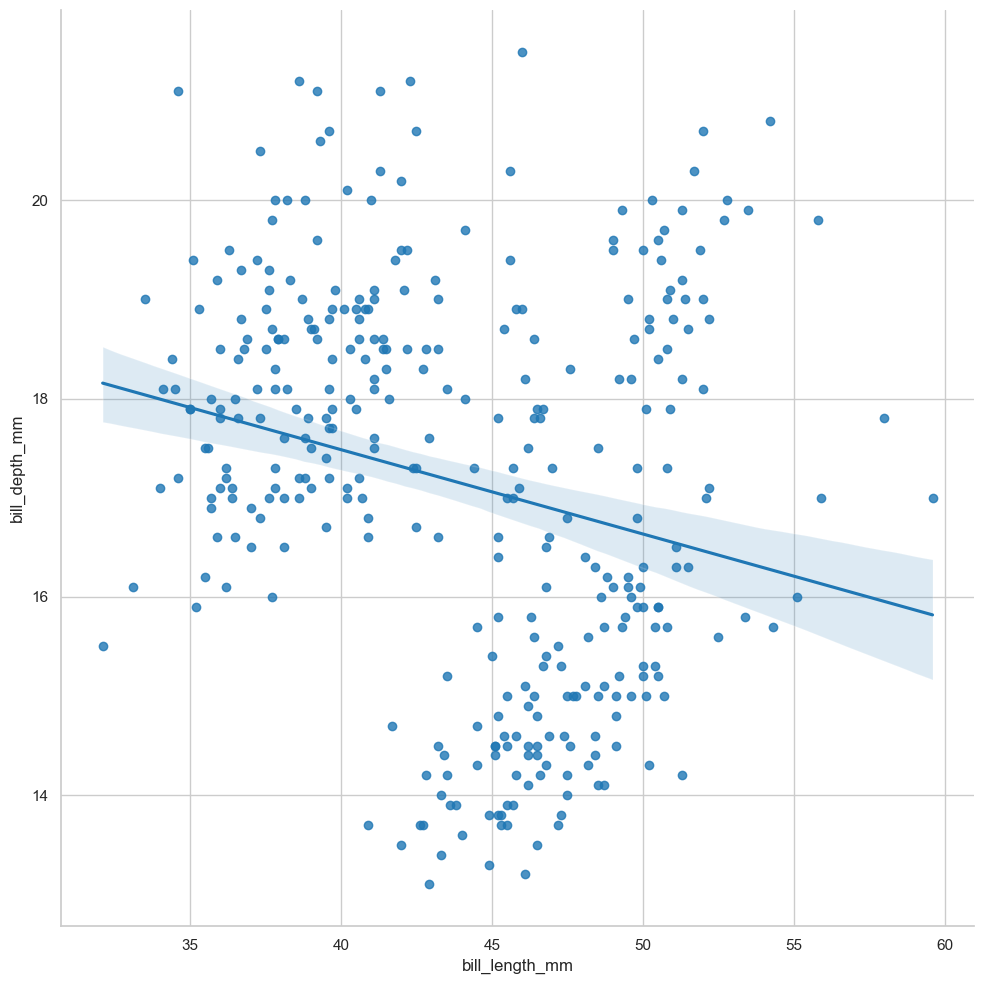

In [42]:
sns.lmplot(data=df, x='bill_length_mm', y='bill_depth_mm', height=10)
plt.show()

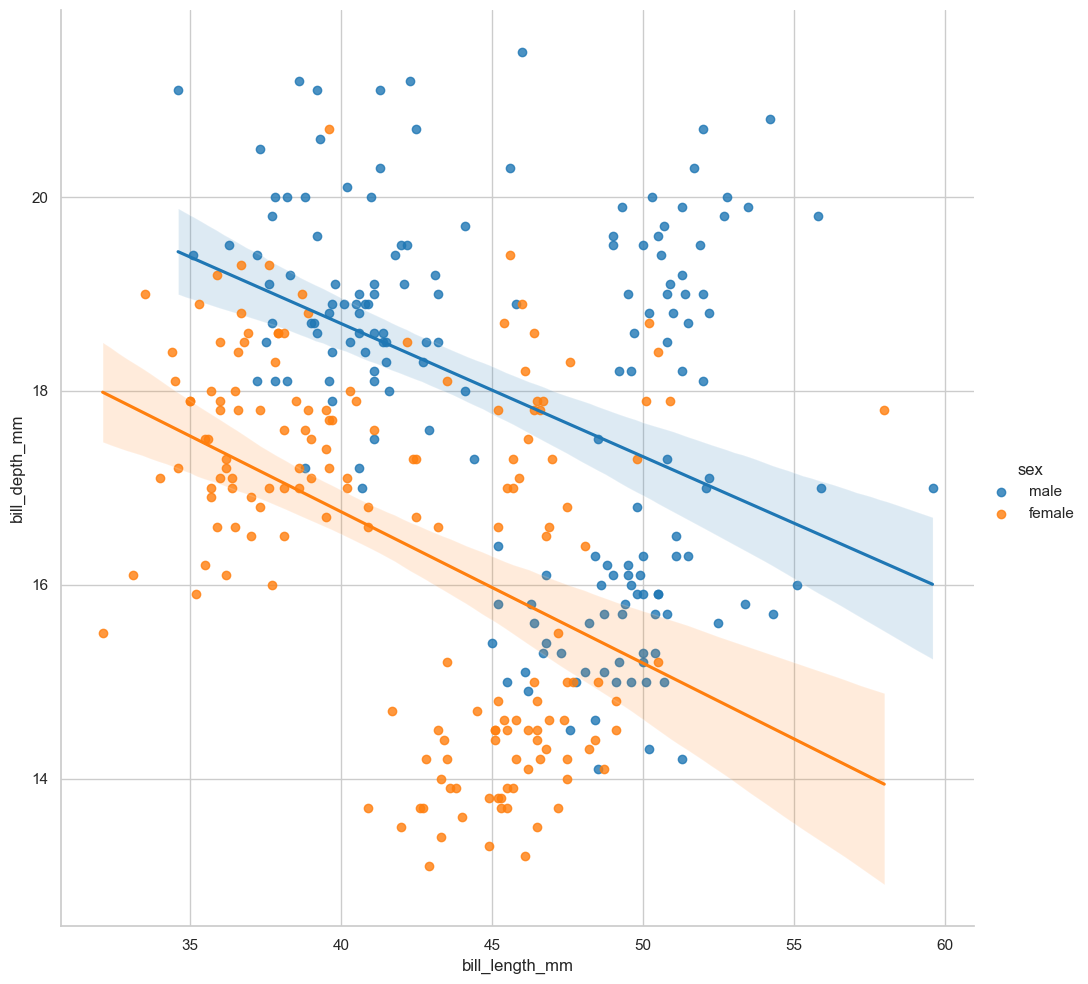

In [43]:
sns.lmplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='sex' ,height=10)
plt.show()

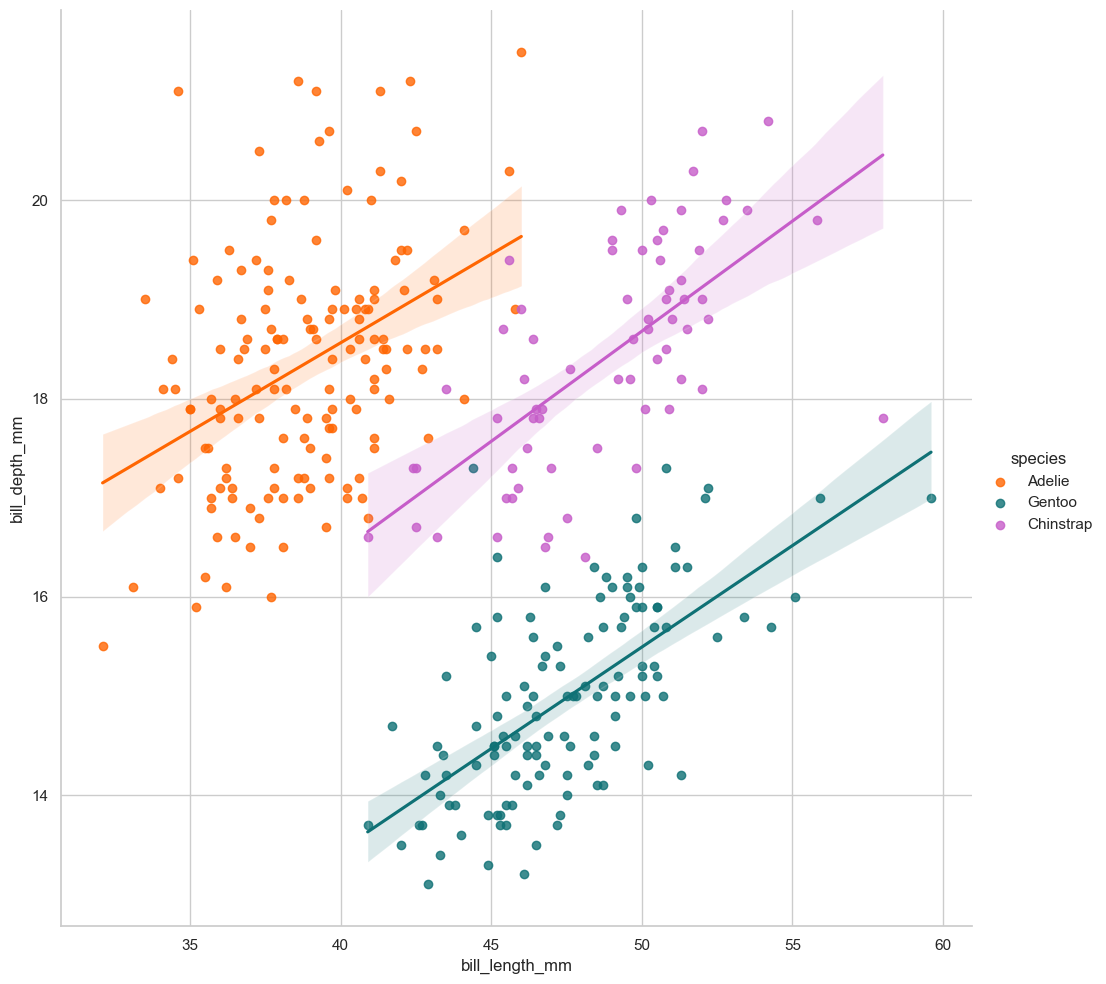

In [44]:
sns.lmplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', height=10, palette=penguin_color)
plt.show()

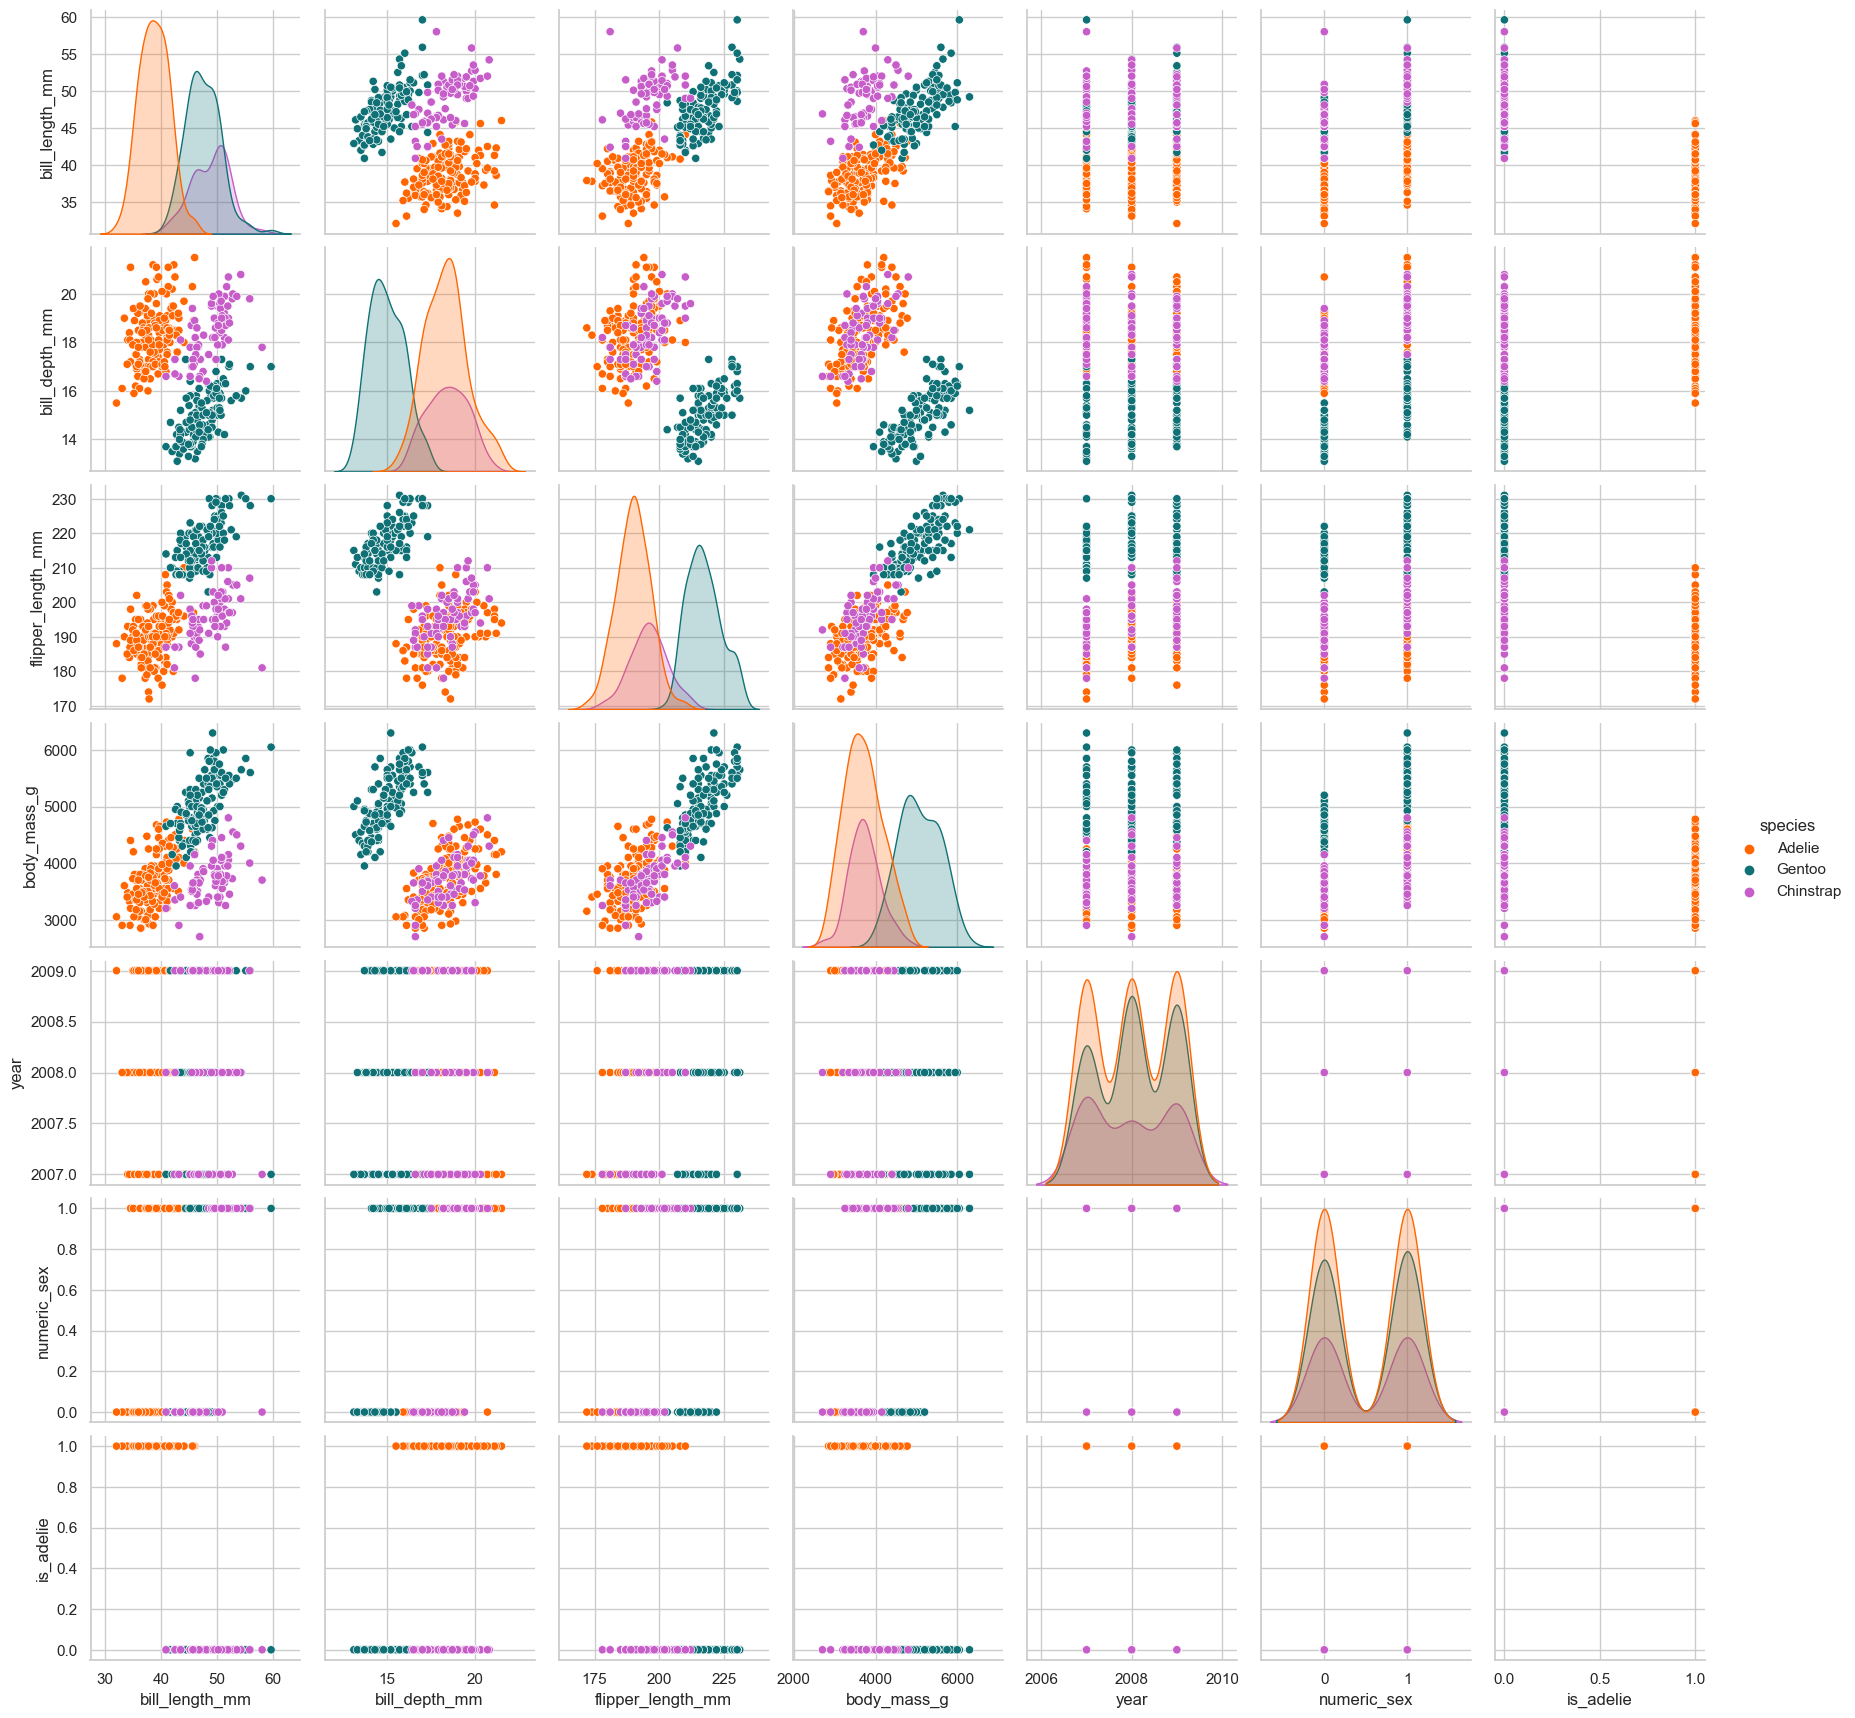

In [45]:
sns.pairplot(data=df, hue='species', palette=penguin_color)
plt.show()